## Pandas

tidak disarankan untuk production karena makan memorinya banyak biasanya kalo production lebih ke numpy karena lebih ringan

In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option("display.max.columns",None)
pd.set_option("display.precision", 2)
%matplotlib inline

In [2]:
x = np.array([1,2,3])
y = np.array([4,5,6])

### Introduction

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

In [4]:
df.shape

(126314, 23)

In [7]:
df.head()
# df.head(10)
# df.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


###  Getting to know your data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [9]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


### Exploring Dataset

In [10]:
df['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [16]:
df[df['fran_id']=='Lakers']['team_id'].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [20]:
df[df['fran_id']=='Lakers'].describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,6024.00,6024.0,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00,6024.00
mean,26258.89,0.5,1982.67,45.97,0.12,105.82,1580.15,1580.34,49.53,102.85,1503.95,1503.76,0.59
std,18891.96,0.5,18.94,26.80,0.33,15.10,90.41,90.76,9.10,14.69,109.24,109.45,0.20
min,569.00,0.0,1949.00,1.00,0.00,18.00,1301.39,1283.24,19.99,19.00,1136.42,1134.30,0.06
25%,7207.50,0.0,1967.00,23.00,0.00,96.00,1520.73,1520.73,43.91,94.00,1430.10,1429.71,0.44
50%,24404.00,0.0,1983.00,45.00,0.00,106.00,1589.64,1589.73,51.18,103.00,1509.07,1509.06,0.61
75%,42454.50,1.0,1999.00,68.00,0.00,116.00,1647.23,1647.48,56.40,113.00,1582.47,1582.46,0.75
max,63069.00,1.0,2015.00,106.00,1.00,162.00,1779.29,1789.99,67.25,173.00,1811.25,1795.67,0.97


In [21]:
df[df['fran_id']=='Lakers']['pts'].agg(("max","min"))

max    162
min     18
Name: pts, dtype: int64

### Data Structure

In [22]:
revenues = pd.Series([1000,2000,3000])
revenues

0    1000
1    2000
2    3000
dtype: int64

In [23]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [24]:
revenues.values

array([1000, 2000, 3000], dtype=int64)

In [25]:
city_rev = pd.Series(data=[1000,2000,3000], index=['Jkt','Sg','Jpn'])

In [26]:
city_rev

Jkt    1000
Sg     2000
Jpn    3000
dtype: int64

In [30]:
city_rev2 = pd.Series({'Jkt':1000,"Ny":2000})
city_rev2

Jkt    1000
Ny     2000
dtype: int64

In [31]:
employee_count = pd.Series(data=[100,200,300], index=['Jkt','Sg','Jpn'])

In [33]:
df_city = pd.DataFrame({
    "revenue":city_rev,
    "employee_count":employee_count
})

In [34]:
df_city

,revenue,employee_count
Jkt,1000,100
Sg,2000,200
Jpn,3000,300


In [35]:
df_city.index

Index(['Jkt', 'Sg', 'Jpn'], dtype='object')

In [36]:
df_city.values

array([[1000,  100],
       [2000,  200],
       [3000,  300]], dtype=int64)

In [37]:
df_city.axes

[Index(['Jkt', 'Sg', 'Jpn'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [39]:
df.index

RangeIndex(start=0, stop=126314, step=1)

In [40]:
df.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

### loc dan iloc

In [42]:
df.loc[df['fran_id']=='Lakers']

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1136,569,194811040BLB,NBA,1,1949,11/4/1948,1,0,MNL,Lakers,84,1527.00,1542.25,51.22,BLB,Baltimore,72,1507.21,1491.95,A,W,0.39,NaN
1152,577,194811060WSC,NBA,1,1949,11/6/1948,2,0,MNL,Lakers,62,1542.25,1536.21,50.62,WSC,Capitols,67,1481.87,1487.92,A,L,0.44,NaN
1159,580,194811090BOS,NBA,1,1949,11/9/1948,3,0,MNL,Lakers,55,1536.21,1513.49,48.34,BOS,Celtics,77,1359.33,1382.05,A,L,0.61,NaN
1170,586,194811110NYK,NBA,1,1949,11/11/1948,4,0,MNL,Lakers,77,1513.49,1524.96,49.50,NYK,Knicks,68,1460.42,1448.95,A,W,0.43,NaN
1183,592,194811130PRO,NBA,1,1949,11/13/1948,5,0,MNL,Lakers,90,1524.96,1533.27,50.33,PRO,Steamrollers,67,1245.95,1237.63,A,W,0.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126016,63009,201504080DEN,NBA,1,2015,4/8/2015,78,0,LAL,Lakers,101,1313.78,1307.51,21.92,DEN,Nuggets,119,1415.06,1421.32,A,L,0.24,NaN
126052,63027,201504100LAL,NBA,0,2015,4/10/2015,79,0,LAL,Lakers,106,1307.51,1312.95,22.37,MIN,Timberwolves,98,1283.92,1278.48,H,W,0.67,NaN
126086,63044,201504120LAL,NBA,0,2015,4/12/2015,80,0,LAL,Lakers,106,1312.95,1305.92,21.79,DAL,Mavericks,120,1556.22,1563.25,H,L,0.30,NaN
126115,63058,201504130SAC,NBA,1,2015,4/13/2015,81,0,LAL,Lakers,92,1305.92,1301.39,21.42,SAC,Kings,102,1395.60,1400.13,A,L,0.25,NaN


In [43]:
df_city.loc['Jkt'] #based on label index

revenue           1000
employee_count     100
Name: Jkt, dtype: int64

In [44]:
df_city.iloc[0] #based on positional index

revenue           1000
employee_count     100
Name: Jkt, dtype: int64

In [47]:
df.loc[0:3,['gameorder','game_id']]

,gameorder,game_id
0,1,194611010TRH
1,1,194611010TRH
2,2,194611020CHS
3,2,194611020CHS


In [46]:
df.iloc[0:3]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


In [49]:
df_city.loc[df_city.revenue > 1000,'employee_count']

Sg     200
Jpn    300
Name: employee_count, dtype: int64

In [53]:
df_city.loc[(df_city.revenue > 1000)&(df_city['employee_count']>200)]

,revenue,employee_count
Jpn,3000,300


In [54]:
df_city.loc[(df_city.revenue > 1000)|(df_city['employee_count']>200)]

,revenue,employee_count
Sg,2000,200
Jpn,3000,300


In [55]:
df_city['revenue']

Jkt    1000
Sg     2000
Jpn    3000
Name: revenue, dtype: int64

In [56]:
df_city.revenue

Jkt    1000
Sg     2000
Jpn    3000
Name: revenue, dtype: int64

### Append

In [60]:
df_city = df_city.append(pd.DataFrame(data=[{"revenue":1000, "employee_count":np.nan}],index=["Toronto"]))

In [61]:
df_city

,revenue,employee_count
Jkt,1000,100.0
Sg,2000,200.0
Jpn,3000,300.0
Toronto,1000,NaN


In [65]:
df_city.isnull().any()

revenue           False
employee_count     True
dtype: bool

In [63]:
df_city[df_city['employee_count'].isnull()]

,revenue,employee_count
Toronto,1000,NaN


In [66]:
### Kelewat gais gara-gara registrasi :"

In [67]:
df.groupby('fran_id',sort=False)['pts'].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [70]:
df[
    (df['team_id'] == 'LAL') &
    (df['year_id'] > 2010)
].groupby(['year_id','game_result'])['game_id'].count()

year_id  game_result
2011     L              31
         W              61
2012     L              32
         W              46
2013     L              41
         W              45
2014     L              55
         W              27
2015     L              61
         W              21
Name: game_id, dtype: int64

In [73]:
nba = df.copy()

In [74]:
nba.shape

(126314, 23)

In [77]:
df['pts_difference'] = np.abs(df['pts'] - df['opp_pts'])

In [78]:
df['pts_difference']

0          2
1          2
2         16
3         16
4         17
          ..
126309    21
126310    13
126311    13
126312     8
126313     8
Name: pts_difference, Length: 126314, dtype: int64

### Exercise

In [101]:
df[(df['team_id'] == "ANA")&(df['game_result'] == 'W')&(df['game_location']=='H')].shape

(17, 24)

1. Visualize top 10 teams that have the most win in Home Game

In [168]:
no1 = df[
    (df['game_location'] == 'H')&
    (df['game_result'] == 'W')
].groupby(['team_id'])['game_result'].count().sort_values(ascending=False).head(10)

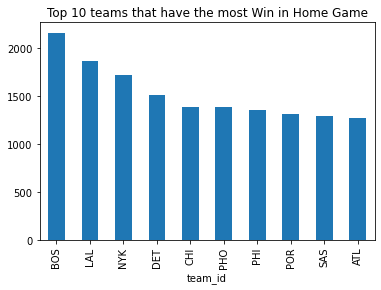

In [169]:
no1.plot(kind="bar")
plt.title("Top 10 teams that have the most Win in Home Game")
plt.show()

2. Visualize LAL number of wins per year starting from 2010

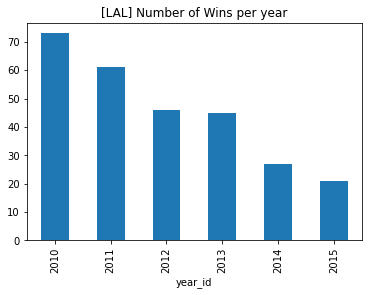

In [178]:
no2 = df[
    (df['team_id'] == 'LAL')&
    (df['year_id'] >= 2010)&
    (df['game_result'] == 'W')
].groupby(['year_id'])['game_result'].count().plot(kind="bar")
plt.title("[LAL] Number of Wins per year")
plt.show()